# 제3장 파이썬을 이용한 GIS 데이터 분석
___
## 3.3 __GIS 분석 활용 사례__


## __사전설정__
---

(1) 저장소 데이터 가져오기

In [ ]:
!rm -rf /content/BizDataAnalysis/

In [1]:
!git clone https://github.com/BizStat/BizDataAnalysis.git

Cloning into 'BizDataAnalysis'...
remote: Enumerating objects: 222, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (40/40), done.
remote: Total 222 (delta 16), reused 40 (delta 8), pack-reused 174 (from 1)
Receiving objects: 100% (222/222), 124.71 MiB | 8.78 MiB/s, done.
Resolving deltas: 100% (69/69), done.
Updating files: 100% (40/40), done.



(2) matplotlib 환경에서 한글 사용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -f -v
!rm ~/.cache/matplotlib -rf

런타임 메뉴에서 '세션 다시 시작' 후 다음의 명령문 실행

In [ ]:
from matplotlib import rc
rc('font', family='NanumMyeongjo')
rc('axes', unicode_minus=False)

___

### __1.__ 수원시에서 가장 면적이 넓은 동네 찾기

In [2]:
import geopandas as gpd

In [3]:
suwon = gpd.read_file('/content/drive/MyDrive/BizDataAnalysis/DATA/suwon.shp')

In [ ]:
suwon

In [ ]:
suwon.area.head()

In [4]:
suwon[suwon.area == max(suwon.area)]['EMD_KOR_NM']

<ipython-input-4-6e34e298fc9c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  suwon[suwon.area == max(suwon.area)]['EMD_KOR_NM']


,EMD_KOR_NM
51,이의동


* 이의동의 경계면

In [5]:
suwon[suwon['EMD_KOR_NM']=='이의동'].boundary

,0
51,"LINESTRING (127.04747 37.31663, 127.0475 37.31..."


<Axes: >

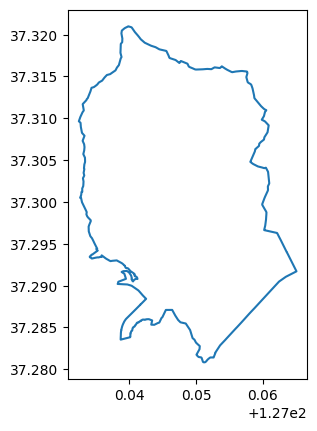

In [6]:
suwon[suwon['EMD_KOR_NM']=='이의동'].boundary.plot()

* 수원시 읍면동 경계선으로 지도 나타내기

<Axes: >

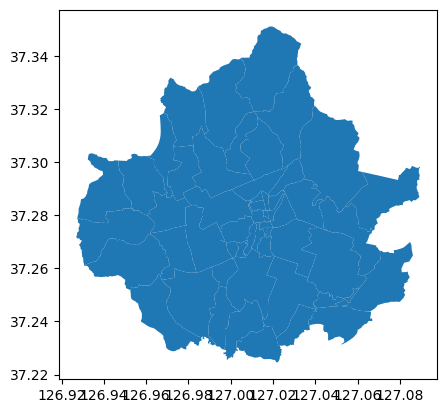

In [7]:
suwon.plot()

<Axes: >

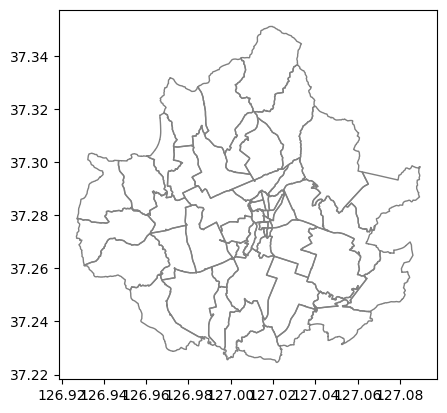

In [8]:
suwon.boundary.plot(linewidth=1,color='grey')

### __2.__ 수원시 지도에 면적에 따라 색 농도 변경

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(facecolor='white',figsize=(8,8))
ax.axis('off')
ax.set_title("수원시 읍면동 현황", fontsize=20)
suwon.plot(ax=ax,column=suwon.area,cmap='viridis')
suwon.boundary.plot(ax=ax,color='grey',linewidth=1)
suwon.centroid.plot(ax=ax,color='red')
plt.show()

### __3.__ 수원시 내에 지구대(파출소)가 있는 동네만 구분해 표현

(1) shape 파일 가져오기

In [ ]:
suwon = gpd.read_file('/content/drive/MyDrive/BizDataAnalysis/DATA/suwon.shp')
sw_ps = gpd.read_file('/content/drive/MyDrive/BizDataAnalysis/DATA/sw_ps.shp')

(2) 데이터 결합

In [ ]:
ps_dong = gpd.sjoin(suwon,sw_ps)

(3) 지도 표현

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(facecolor='white',figsize=(8,8))
ax.axis('off')
ax.set_title("수원시에서 지구대(파출소)가 있는 읍면동 현황", fontsize=20)
suwon.boundary.plot(ax=ax,color='grey',linewidth=1)
ps_dong.plot(ax=ax,color='grey')
plt.show()